In [1]:
import pandas as pd
import numpy as np
from scipy import signal

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('seaborn-poster')

# CV

In [2]:
cv_buch_2018 = pd.read_csv('Новые резюме по неделям 2018.csv')
cv_buch_2019 = pd.read_csv('Новые резюме по неделям 2019.csv')

cv_buch_2018_group = cv_buch_2018.groupby(['Должность', 'Фокусные города'])
cv_buch_2019_group = cv_buch_2019.groupby(['Должность', 'Фокусные города'])

In [3]:
cv_buch_2018.head()

,Неделя,Фокусные города,Должность,Новых резюме
0,11,Остальные города,Бухгалтер,565
1,12,Остальные города,Бухгалтер,506
2,21,Остальные города,Бухгалтер,476
3,15,Остальные города,Бухгалтер,455
4,14,Остальные города,Бухгалтер,448


In [4]:
cv_buch_2018.shape, cv_buch_2019.shape

((176, 4), (224, 4))

In [5]:
vacancies = cv_buch_2018['Должность'].unique()
cities = cv_buch_2018['Фокусные города'].unique()
norm_city = 'Остальные города'

<Figure size 1440x720 with 0 Axes>

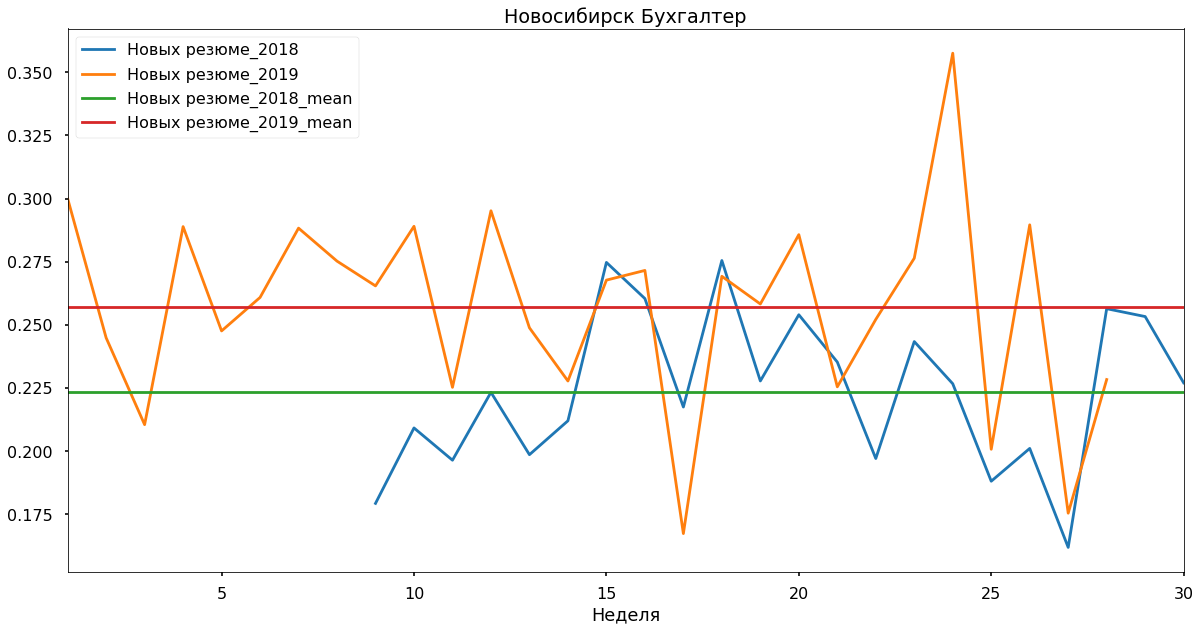

<Figure size 1440x720 with 0 Axes>

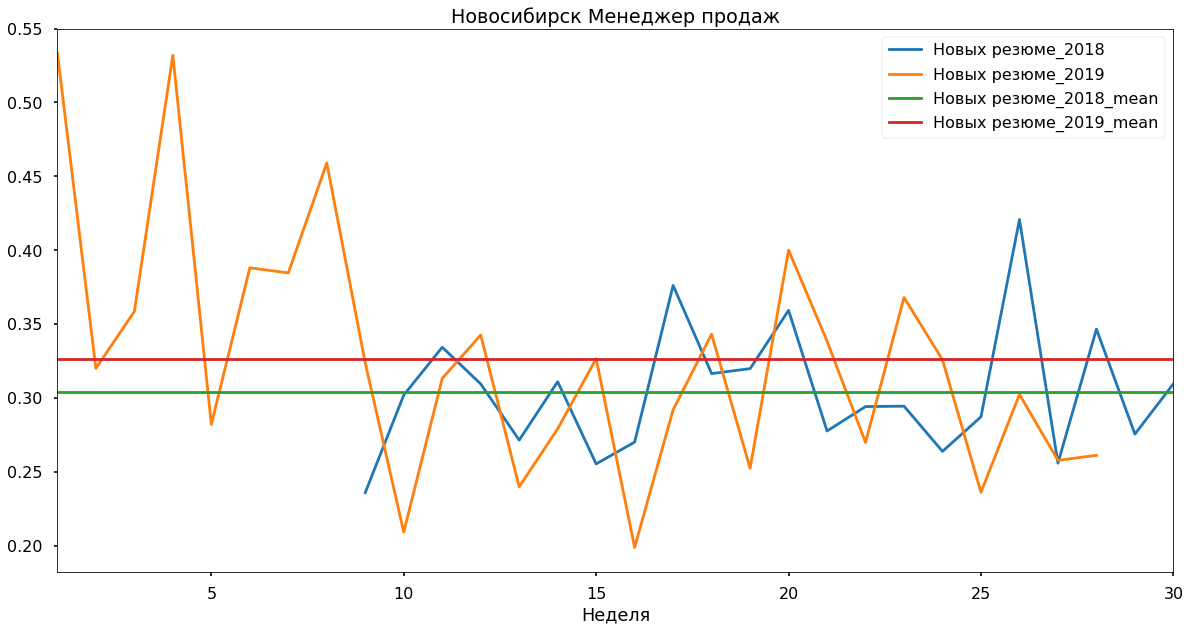

<Figure size 1440x720 with 0 Axes>

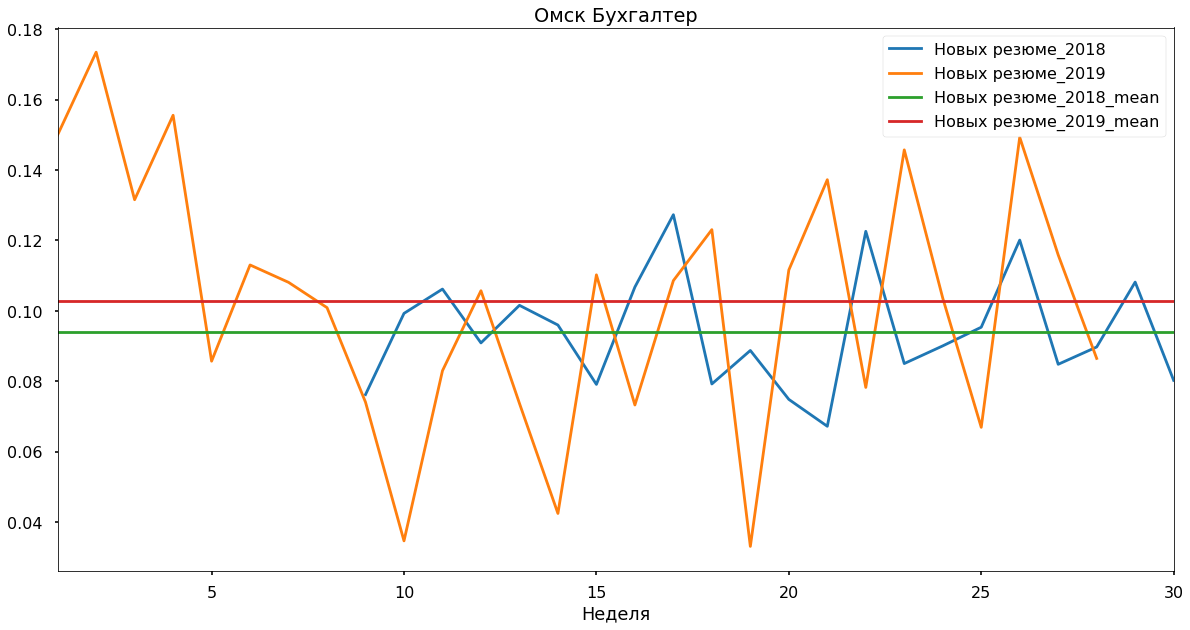

<Figure size 1440x720 with 0 Axes>

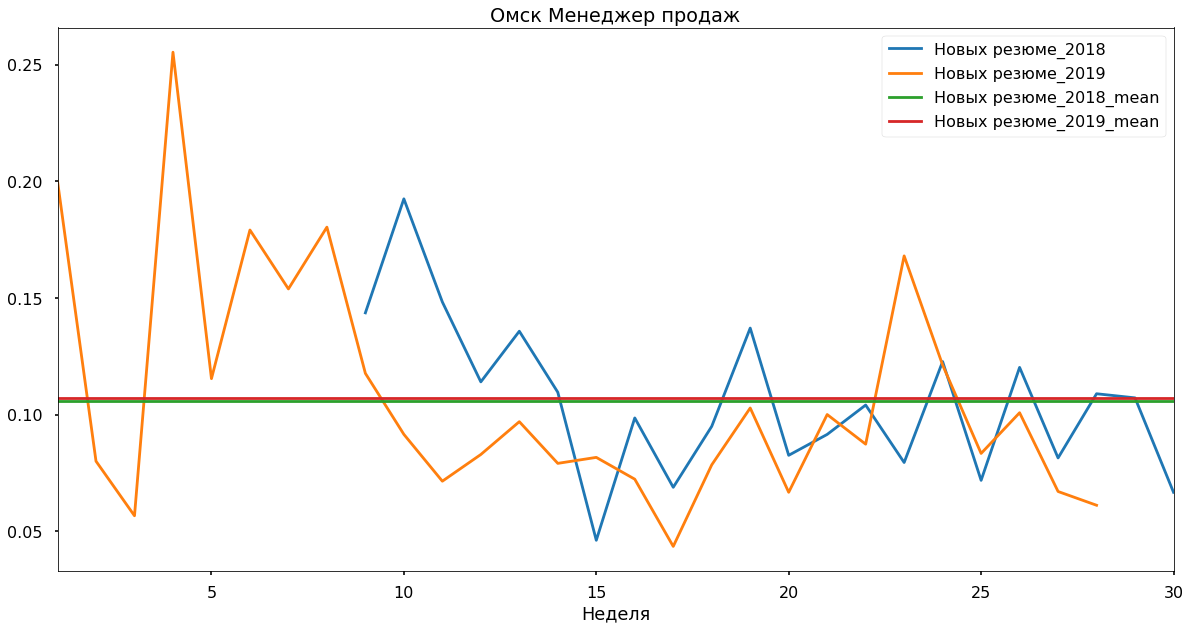

<Figure size 1440x720 with 0 Axes>

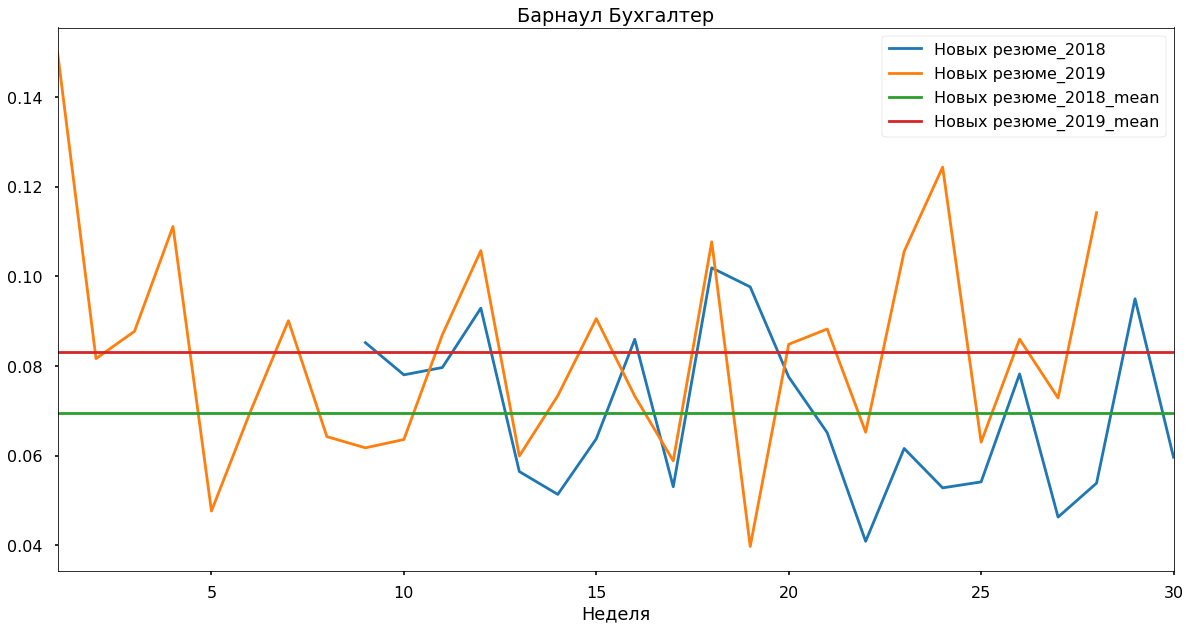

<Figure size 1440x720 with 0 Axes>

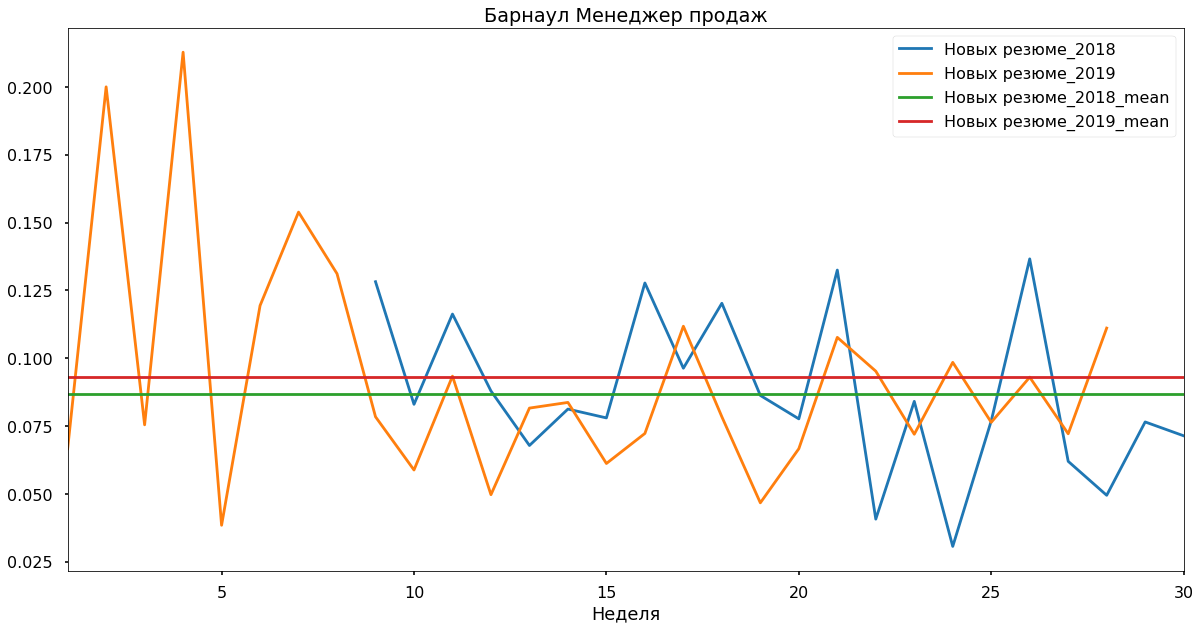

In [9]:
city = cities[1]
vacancy = vacancies[0]
for city in cities:
    if city == norm_city:
        continue
    
    for vacancy in vacancies:
        # 2018
        plot_df_2018 = cv_buch_2018_group.get_group((vacancy, city)).sort_values('Неделя').reset_index(drop=True)[['Неделя', 'Новых резюме']]
        norm_sr = cv_buch_2018_group.get_group((vacancy, norm_city)).sort_values('Неделя').reset_index(drop=True)['Новых резюме']
        plot_df_2018['Новых резюме'] = plot_df_2018['Новых резюме'] / norm_sr
        # 2019
        plot_df_2019 = cv_buch_2019_group.get_group((vacancy, city)).sort_values('Неделя').reset_index(drop=True)[['Неделя', 'Новых резюме']]
        norm_sr = cv_buch_2019_group.get_group((vacancy, norm_city)).sort_values('Неделя').reset_index(drop=True)['Новых резюме']
        plot_df_2019['Новых резюме'] = plot_df_2019['Новых резюме'] / norm_sr
        # merge
        plot_df = pd.merge(plot_df_2018, plot_df_2019, how='outer', on='Неделя',suffixes=['_2018', '_2019'] )
        plot_df = plot_df.sort_values('Неделя').reset_index(drop=True)
        # mean
        plot_df['Новых резюме_2018_mean'] = plot_df['Новых резюме_2018'].mean()
        plot_df['Новых резюме_2019_mean'] = plot_df['Новых резюме_2019'].mean()
        
        plt.figure(figsize=(20, 10))
        plot_df.plot(x='Неделя', title=f'{city} {vacancy}', figsize=(20, 10))
        plt.show()